In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #tried building a correlation heat map but failed
import numpy as np
%matplotlib inline

In [3]:
path = "Data/CTA_Questionnaire.csv"
df = pd.read_csv(path)

In [4]:
print(df)

                       Timestamp                      Cook    Enjoy  \
0    2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)     Yes!   
1    2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)  Neutral   
2    2024/10/17 2:14:21 PM GMT+1         Rare (0-2 weekly)     Yes!   
3    2024/10/17 2:14:35 PM GMT+1         Rare (0-2 weekly)  Neutral   
4    2024/10/17 2:15:21 PM GMT+1    Very often (everyday!)     Yes!   
5    2024/10/17 2:15:44 PM GMT+1    Very often (everyday!)     Yes!   
6    2024/10/17 2:17:07 PM GMT+1     Occasionally (weekly)  Neutral   
7    2024/10/17 2:40:22 PM GMT+1  Often (4-6 times weekly)     Yes!   
8    2024/10/17 3:57:36 PM GMT+1  Often (4-6 times weekly)     Yes!   
9    2024/10/17 4:47:46 PM GMT+1    Very often (everyday!)     Yes!   
10   2024/10/17 8:27:53 PM GMT+1  Often (4-6 times weekly)  Neutral   
11   2024/10/18 9:29:05 AM GMT+1  Often (4-6 times weekly)     Yes!   
12   2024/10/20 3:02:38 PM GMT+1  Often (4-6 times weekly)     Yes!   
13  20

In [5]:
# 01 Understanding the correlation between low rating people and their preferred cuisine, hence we could know what type of cuisine is bad in London

In [6]:
#Get the rows (individuals) which gives a rating of 3 and below

low_rating_df = df.loc[df["Rating"] <= 3]

#Obtain all the rows in that "Favourite" Column using loc, then split them into a long list
#loc[x,y] / x = row index, with : means all / y = column index, means of which question
#Here i am modifying the dataset
low_rating_df.loc[:,"Favourite"] = low_rating_df["Favourite"].str.split(";")

In [7]:
#Here i am giving the name "tidy_data_df" of the newly sorted favourite resturants data
tidy_data_df = low_rating_df.explode("Favourite")

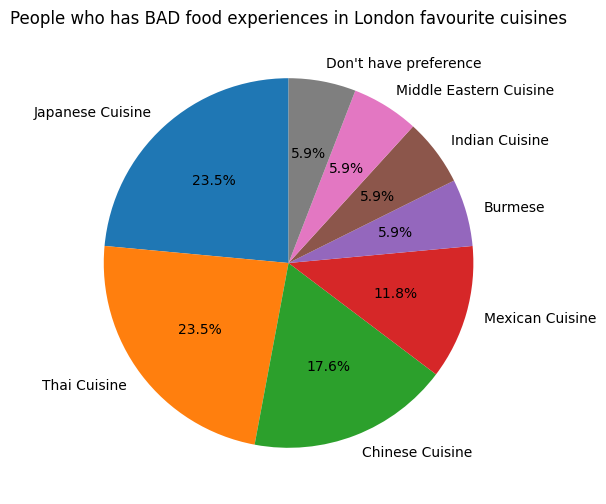

In [8]:
cuisine_counts = tidy_data_df["Favourite"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=90)

# Give Pie Chart the title
plt.title("People who has BAD food experiences in London favourite cuisines")

# Show the pie chart
plt.show()

<h3> /\ INSIGHTS 01 </h3>
<h3>People who has a bad food experience in London are mostly into South East Asian Cuisine. </h3>
<h3> Choosing Japanese, Thai and Chinese Cuisine could be a risky choice in London in general. </h3>

In [ ]:
#02 Which part of London has most favourite restuarants? And which type of cuisine is popular in that area?

In [10]:
location_data = df["Location"].value_counts()
print(location_data)

Location
East (Shoreditch, Hackney, Stratford, and Canary Wharf etc)          6
Central (Buckingham Palace, the West End, the City of London etc)    4
South (Clapham, Brixton, and Greenwich etc)                          3
No I don't have one                                                  3
West (Kensington, Chelsea, and Notting Hill etc)                     1
Name: count, dtype: int64


In [11]:
#change name of index (I realised once we use MAP we cannot value_counts properly?)
new_name = {'North (Camden, Islington, and Hampstead etc)':'North',
            'East (Shoreditch, Hackney, Stratford, and Canary Wharf etc)':'East',
            'South (Clapham, Brixton, and Greenwich etc)':'South', 
            'West (Kensington, Chelsea, and Notting Hill etc)':'West',
            'Central (Buckingham Palace, the West End, the City of London etc)':'Central',
            "No I don't have one":"None"}
updated_location = df['Location'].map(new_name)
df['Location'] = updated_location
location_data = df["Location"].value_counts()
print(location_data)

Location
East       6
Central    4
South      3
None       3
West       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Favourite Restaurants in London')

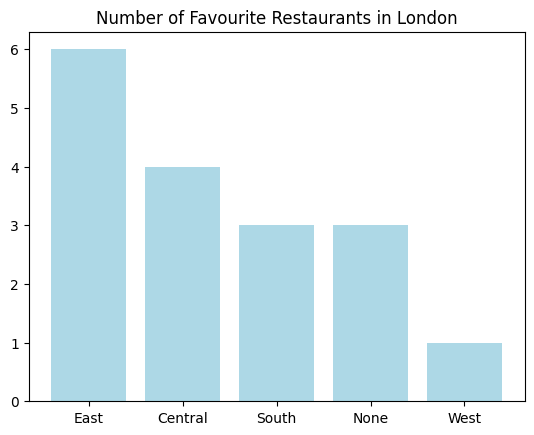

In [12]:
#now we setup a bar chart to show the number of restaurant in different area (using matplotlab library here)
#plt.bar(categories or index / values / bar width / colour / alignment )
#.INDEX and .VALUE are attributes to objects in Pandas , not python
plt.bar(location_data.index, location_data.values, color='lightblue')
plt.title("Number of Favourite Restaurants in London")

<h3>/\ INSIGHTS 02 : </h3>
<h3> 1/3 of us think East London has the best restuarant </h3>
<h3> East London is probably the best area to look for best restaurants. </h3>

In [18]:
#2.1 What kind of cuisines are popular in east london?

In [17]:
#Get the row (people) which selected East London
east_london_restaurant = df.loc[df.Location == 'East']

#I need to separate every answer into strings here using explode, which will be a long dataframe
#Explode() will creates a subset of dataframe, separating multiple strings withn a single row in to rows of single string
all_cuisines_df = df['RestaurantType'].str.split(';').explode()

#list out everyone's answer and print it out as a subset DF
cuisines_count_df = all_cuisines_df.value_counts()
print(cuisines_count_df)

RestaurantType
Thai Cuisine              5
Chinese Cuisine           4
Japanese Cuisine          4
Italian Cuisine           3
Caribbean Cuisine         2
Peruvian Cuisine          2
Don't have preference     1
Middle Eastern Cuisine    1
Mexican Cuisine           1
Laos                      1
Name: count, dtype: int64


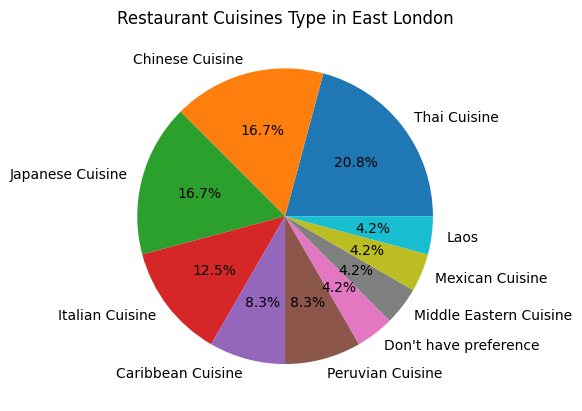

In [16]:
#Extracting the labels (cuisine types) and the sizes (counts)
labels = cuisines_count_df.index
sizes = cuisines_count_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title("Restaurant Cuisines Type in East London")

# Display the chart
plt.show()


<h3>/\ INSIGHTS 2.1 : </h3>
<h3> East london is voted as the best place to go Thai Cuisine, that's tricky with the first insight. </h3>

In [ ]:
#3 do people explore more grocery options when they cook more? (Initially a heatmap but have to withdraw to bar chart)

In [19]:
#Again I need to "flatten" the data from the grocery list question 
df["Grocery"].value_counts()
tidy_up_df = df["Grocery"].str.split(";").explode()
grocery_count_df = tidy_up_df.value_counts()
print(grocery_count_df)

Grocery
Sainsbury's                           7
Tesco                                 6
Morrisons                             5
Waitrose                              5
Lidl                                  3
Farmers' Market /Independent Shops    3
Asda                                  2
Chinese store!!!                      1
Co-op Food                            1
HelloFresh                            1
M&S                                   1
not particular about shop             1
Name: count, dtype: int64


Text(0.5, 1.0, 'Where do you usually go for groceries?')

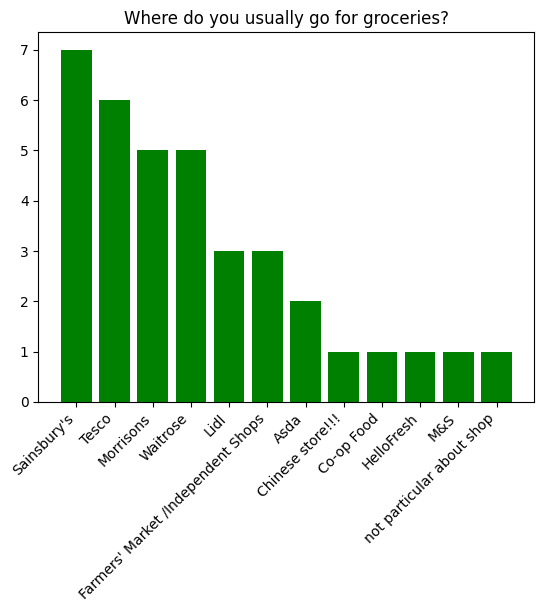

In [20]:
#Initially I wish to create a heatmap showing correlations between cooking frequency and grocery shops, but cannot properly tell the machine to do so.
#Hence I am summarising it into a simple bar chart here, using matplotlab library
plt.bar(grocery_count_df.index, grocery_count_df.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Where do you usually go for groceries?")

<h3> /\ INSIGHTS 03 : </h3>
<h3> Sainsbury's is the most popular options for grocery shopping </h3>

In [23]:
#Below is my attempt to create a heatmap following CHATGPT, but not sure why it is not working, 
#I thought if i can use my tidy_data_df to match with "Cook" series from the original df, but think the machine is not reading the tidy_data properly?

tidy_up_df = df["Grocery"].str.split(";").explode()

# Create the cross-tabulation (contingency table)
contingency_table = pd.crosstab(tidy_up_df, df.loc[tidy_up_df.index, 'Cook'])

# Plot the heatmap
sns.heatmap(contingency_table, annot=True, cmap='Blues', linewidths=0.5)

# Add a title
plt.title('Heatmap of Grocery Choice vs Cooking Frequency')

# Show the plot
plt.show()

ValueError: cannot reindex on an axis with duplicate labels